## Collecting Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk , re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
data = pd.read_csv('/content/spam.csv',encoding = 'ISO-8859-1')
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
data.drop('Unnamed: 3' , axis = 1 , inplace = True)
data.drop('Unnamed: 2' , axis = 1 , inplace = True)
data.drop('Unnamed: 4' , axis = 1 , inplace = True)

In [4]:
data = data.rename( columns= {'v1':'Target' , 'v2' : 'Text'})
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [0]:
data.dtypes

Target    object
Text      object
dtype: object

In [0]:
data.shape

(5572, 2)

In [0]:
data.loc[0,'Text']


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Text Preprocessing and Feature Engineering

In [0]:
def pipeline( text ) :
    # Handling email addresses
    text = text.apply(lambda text : re.sub(r'\S+@\S+' , 'EmailAdress' , text) )
    
    # Handling web adresses
    text = text.apply(lambda text : re.sub(r'https\://\S+','URL' , text) )
    
    # Handling 1+ WhiteSpaces and Non-characters 
    text = text.apply(lambda text : re.sub(' +' , ' ' , text ) )
    text = text.apply(lambda text : re.sub('\n+' , ' ' , text ) )
    text = text.apply(lambda text : re.sub(r'[^\w\s]','' , text) )
    text = text.apply(lambda text : re.sub(r'\d+','' , text) )
    
    # Handling StopWords
    stpwrd = stopwords.words('english')
    text = text.apply(lambda x : ' '.join( word.lower() for word in x.split() if word not in stpwrd))
    
    # Handling Wrong spellings
    #text = text.apply( lambda x : ' '.join(str(TextBlob(word).correct()) for word in x.split(' ') ) )

    # Handling Root words
    stemming = PorterStemmer()
    text = text.apply(lambda x : ' '.join( stemming.stem(word) for word in x.split() ))
    
    # Lemmatizing words
    lemma = WordNetLemmatizer()
    text = text.apply(lambda x : ' '.join( lemma.lemmatize(word) for word in x.split() ))
    
    return text

In [0]:
text_messages = 'Hi my name is somthing@someserver.com https://www.datascience.com'
text_messages =re.sub(r'\S+@\S+','emailaddress' , text_messages)
re.sub(r'https\://\S+','URL' , text_messages)

'Hi my name is emailaddress URL'

In [0]:
data.Text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

In [0]:
#nltk.download('stopwords')
#nltk.download('wordnet')
data.Text = pipeline( data.Text )

In [0]:
data.Text

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    nd time tri contact u u å pound prize claim ea...
5568                             ì_ b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth el n...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

In [0]:
data

,Target,Text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u å pound prize claim ea...
5568,ham,ì_ b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth el n...


In [0]:
data.isna().sum()

Target    0
Text      0
dtype: int64

In [0]:
#Train and test split with 80:20 ratio
train, test = train_test_split(data, test_size=0.2) 
# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros

MAX_SEQUENCE_LENGTH = 300 

# Top 20000 frequently occurring words
MAX_NB_WORDS = 20000 
tokens = Tokenizer(num_words = MAX_NB_WORDS )
tokens.fit_on_texts(train.Text)
train_seq = tokens.texts_to_sequences(train.Text)
test_seq = tokens.texts_to_sequences(test.Text)

In [0]:
train.shape , test.shape

((4457, 2), (1115, 2))

In [0]:
len(tokens.word_index)

6319

In [10]:
# For padding let's get the maxLen of sequence
maxLen = -1
for word in train_seq:
  if len(word) > maxLen :
    maxLen = len(word)
print(maxLen)
for word in test_seq:
  if len(word) > maxLen :
    maxLen = len(word)
print(maxLen)

86
86


In [0]:
train_data = pad_sequences( train_seq , maxlen =300)
test_data = pad_sequences( test_seq , maxlen =300)

In [0]:
train_data

array([[   0,    0,    0, ..., 2014,  261,  307],
       [   0,    0,    0, ...,   30, 2015,   40],
       [   0,    0,    0, ...,    2, 1110, 1568],
       ...,
       [   0,    0,    0, ...,   21,    2,   52],
       [   0,    0,    0, ...,   25, 2775, 6318],
       [   0,    0,    0, ...,  164, 2598, 6319]], dtype=int32)

In [0]:
## Encoding our target
encode = LabelEncoder()
encode.fit(train.Target)
train_labels = encode.transform(train.Target)
test_labels = encode.transform(test.Target)


In [0]:
encode.classes_ , encode

(array(['ham', 'spam'], dtype=object), LabelEncoder())

In [0]:
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1]), array([3864,  593]))
(array([0, 1]), array([961, 154]))


In [0]:
train_labels

array([0, 0, 1, ..., 0, 1, 0])

## Exploratory Data Analysis

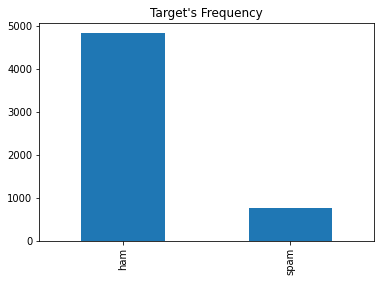

In [0]:
data['Target'].value_counts().plot(kind ='bar' , title = 'Target\'s Frequency' )
plt.show()

## Exploring words in our training dataset

In [0]:
spam_train = sum(train_labels)
ham_train = len(train_labels ) - sum(train_labels)
spam_train , ham_train

(593, 3864)

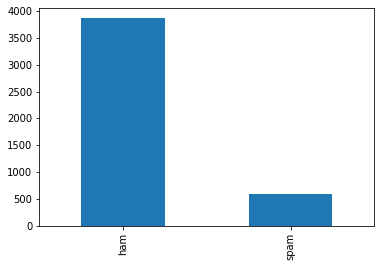

In [0]:
train['Target'].value_counts().plot(kind = 'bar' )
plt.show()

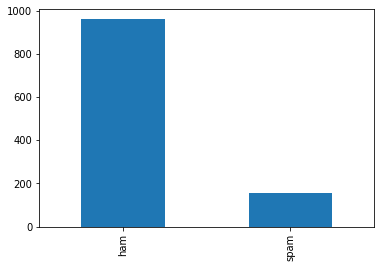

In [0]:
test['Target'].value_counts().plot(kind = 'bar' )
plt.show()

## Most common spam words in our dataset

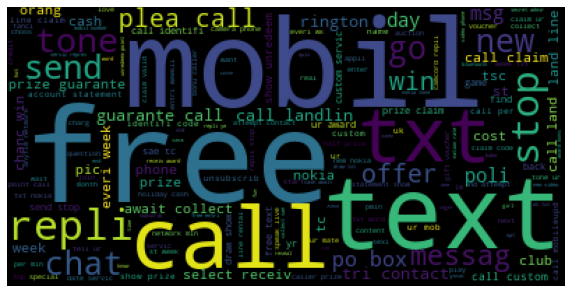

In [0]:
stringg = data[ data.Target == 'spam'].Text.str.cat()
wcloud = WordCloud().generate(stringg)
plt.figure(figsize = [10,23])
plt.imshow(wcloud)
plt.axis('off')
(-0.5,399.5,199.5,-0.5)
plt.show()

In [0]:
## Preparing our labels our neural network changing dtypes
from tensorflow import keras
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [0]:
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', train_labels.shape)

Shape of data tensor: (4457, 80)
Shape of label tensor: (4457,)


## Modelling

In [0]:
from keras.layers import Dense , LSTM , SimpleRNN , Dropout , Activation , Embedding
from keras.layers import Bidirectional , MaxPooling1D , Conv1D , Flatten , BatchNormalization , GlobalMaxPool1D
from keras.models import Sequential 

In [0]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS , 100 , input_length = MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128,5,activation='relu'))
model.add(MaxPooling1D(5))
model.add(BatchNormalization())
model.add(Conv1D(128,5,activation='relu'))
model.add(MaxPooling1D(5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(2,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          2000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 59, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 59, 128)           512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 55, 128)           82048     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 128)          

In [47]:
model.compile(loss='categorical_crossentropy' , optimizer='adam',metrics =['accuracy'])
history = model.fit(train_data,train_labels , batch_size = 64 , epochs = 5 , verbose = 1 , validation_split = 0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 1s 370us/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.1295 - val_accuracy: 0.9910
Epoch 2/5
3565/3565 [==============================] - 1s 243us/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0755 - val_accuracy: 0.9899
Epoch 3/5
3565/3565 [==============================] - 1s 237us/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.1083 - val_accuracy: 0.9888
Epoch 4/5
3565/3565 [==============================] - 1s 239us/step - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.1057 - val_accuracy: 0.9922
Epoch 5/5
3565/3565 [==============================] - 1s 237us/step - loss: 0.0136 - accuracy: 0.9972 - val_loss: 0.0844 - val_accuracy: 0.9888


In [48]:
predicted=model.predict(test_data)
predicted

#model evaluation

import sklearn
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test_labels, predicted.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(test_labels, predicted.round()))

precision: [0.98082745 0.98387097]
recall: [0.99794661 0.86524823]
fscore: [0.98931298 0.92075472]
support: [974 141]
############################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       974
           1       0.98      0.87      0.92       141

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115
 samples avg       0.98      0.98      0.98      1115



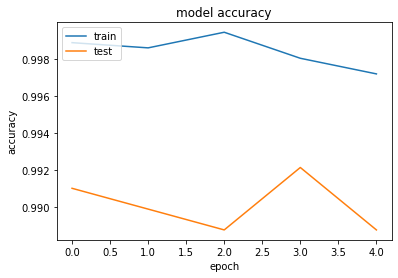

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

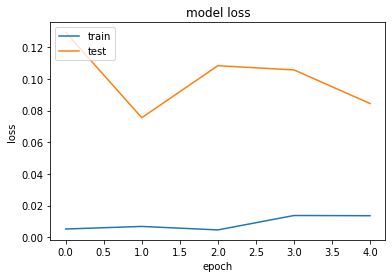

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
#import library
from keras.layers.recurrent import SimpleRNN

#model training

print('Training SIMPLERNN model.')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
 100,
 input_length=MAX_SEQUENCE_LENGTH
 ))
model.add(SimpleRNN(2, input_shape=(None,1)))

model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

history = model.fit(train_data, train_labels,batch_size=16,epochs=5, validation_split =0.2 )

Training SIMPLERNN model.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 43s 12ms/step - loss: 0.4629 - accuracy: 0.8858 - val_loss: 0.2898 - val_accuracy: 0.9552
Epoch 2/5
3565/3565 [==============================] - 42s 12ms/step - loss: 0.1763 - accuracy: 0.9778 - val_loss: 0.1676 - val_accuracy: 0.9709
Epoch 3/5
3565/3565 [==============================] - 42s 12ms/step - loss: 0.0865 - accuracy: 0.9933 - val_loss: 0.1265 - val_accuracy: 0.9765
Epoch 4/5
3565/3565 [==============================] - 42s 12ms/step - loss: 0.0510 - accuracy: 0.9980 - val_loss: 0.1109 - val_accuracy: 0.9765
Epoch 5/5
3565/3565 [==============================] - 42s 12ms/step - loss: 0.0365 - accuracy: 0.9980 - val_loss: 0.1054 - val_accuracy: 0.9709


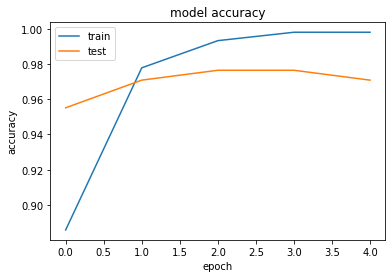

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

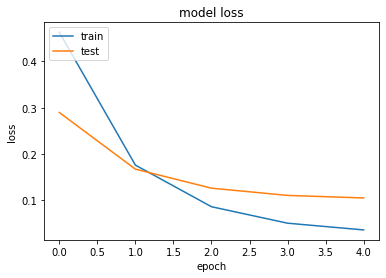

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:

#model training

print('Training LSTM model.')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
 100,
 input_length=MAX_SEQUENCE_LENGTH
 ))
model.add(LSTM(output_dim=16, activation='relu', inner_activation='hard_sigmoid',return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

history = model.fit(train_data, train_labels, batch_size=16,epochs=5,validation_split=0.2)

Training LSTM model.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="relu", return_sequences=True, units=16, recurrent_activation="hard_sigmoid")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/5
3565/3565 [==============================] - 184s 52ms/step - loss: 0.1442 - accuracy: 0.9484 - val_loss: 0.2772 - val_accuracy: 0.9070
Epoch 2/5
3565/3565 [==============================] - 183s 51ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0936 - val_accuracy: 0.9776
Epoch 3/5
3565/3565 [==============================] - 183s 51ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0714 - val_accuracy: 0.9843
Epoch 4/5
3565/3565 [==============================] - 183s 51ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0945 - val_accuracy: 0.9809
Epoch 5/5
3565/3565 [==============================] - 182s 51ms/step - loss: 6.9928e-04 - accuracy: 0.9997 - val_loss: 0.0896 - val_accuracy: 0.9821


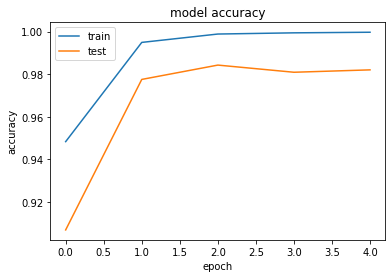

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

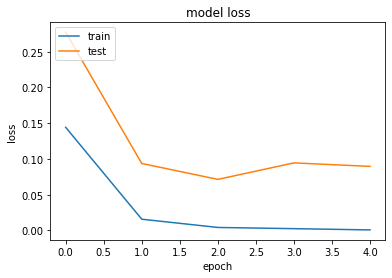

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
predicted_lstm=model.predict(test_data)
predicted_lstm

#model evaluation 

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test_labels, predicted_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(test_labels, predicted_lstm.round()))

precision: [0.98582996 1.        ]
recall: [1.         0.90070922]
fscore: [0.99286442 0.94776119]
support: [974 141]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       974
           1       1.00      0.90      0.95       141

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



In [65]:
print('Training Bidirectional LSTM model.')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS,
 100,
 input_length=MAX_SEQUENCE_LENGTH
 ))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(Conv1D(16, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform"))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(2,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

history = model.fit(train_data, train_labels,batch_size=16,epochs=3,validation_data=(test_data, test_labels))

Training Bidirectional LSTM model.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4457 samples, validate on 1115 samples
Epoch 1/3
4457/4457 [==============================] - 314s 70ms/step - loss: 0.1583 - accuracy: 0.9466 - val_loss: 0.0568 - val_accuracy: 0.9874
Epoch 2/3
4457/4457 [==============================] - 311s 70ms/step - loss: 0.0201 - accuracy: 0.9955 - val_loss: 0.0634 - val_accuracy: 0.9892
Epoch 3/3
4457/4457 [==============================] - 311s 70ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.0752 - val_accuracy: 0.9839


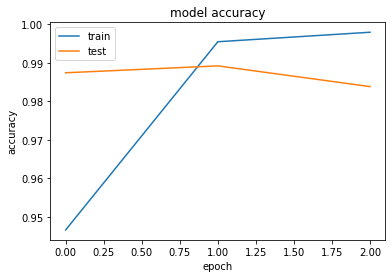

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

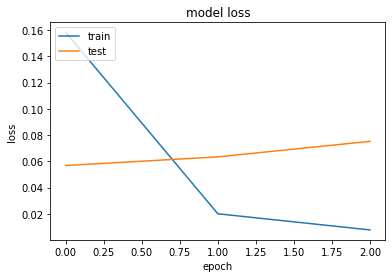

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:

predicted_blstm=model.predict(test_data)
predicted_blstm

#model evaluation

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test_labels, predicted_blstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

print("############################")

print(sklearn.metrics.classification_report(labels_test, predicted_blstm.round()))

precision: [0.98676171 0.96240602]
recall: [0.99486653 0.90780142]
fscore: [0.99079755 0.93430657]
support: [974 141]
############################


NameError: ignored

In [79]:
email = pd.Series(['Hey you won a free lottery ticket'])
email = pipeline(email)
email = tokens.texts_to_sequences(email)
email = pad_sequences(email , maxlen = 300 )
model.predict_classes(email)


array([0])

In [0]:
ham , spam = data.Text[0] , data.Text[2]

In [82]:
email = pd.Series([ham])
email = pipeline(email)
email = tokens.texts_to_sequences(email)
email = pad_sequences(email , maxlen = 300 )
model.predict_classes(email)

array([0])

In [93]:
email = pd.Series([spam])
email = pipeline(email)
email = tokens.texts_to_sequences(email)
email = pad_sequences(email , maxlen = 300 )
if model.predict_classes(email)[0] == 1 :
  print(f'{spam} ------>>> SPAM')
else:
  print('Ham')


free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over ------>>> SPAM


In [0]:
model.save('Model.h5')